In [87]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

import itertools

from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

In [88]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [89]:
# normalize data
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [90]:
num_classes = 10

# reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

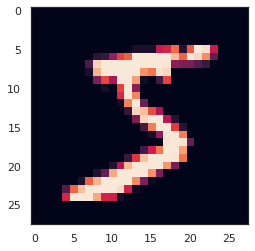

In [91]:
# some examples
g = plt.imshow(x_train[0][:,:,0])

In [ ]:
# # Set the CNN model
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

# # define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# # Compile the model
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [92]:
# Set the CNN model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [94]:
batch_size = 32
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 48s 893us/step - loss: 0.1067 - accuracy: 0.9670 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 2/10
54000/54000 [==============================] - 48s 897us/step - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 3/10
54000/54000 [==============================] - 49s 912us/step - loss: 0.0600 - accuracy: 0.9808 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 4/10
54000/54000 [==============================] - 48s 889us/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 5/10
54000/54000 [==============================] - 48s 890us/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 6/10
54000/54000 [==============================] - 48s 888us/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 7/10
54000/54000 [==============================] -

In [96]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.024301116205440485
Test accuracy:  0.991100013256073


In [48]:
# # set a learning rate annealer
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)

In [52]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [ ]:
# epochs = 30
# batch_size = 86

# # fit the model
# history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (x_test,y_test),
#                               verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])